Przygotowanie danych

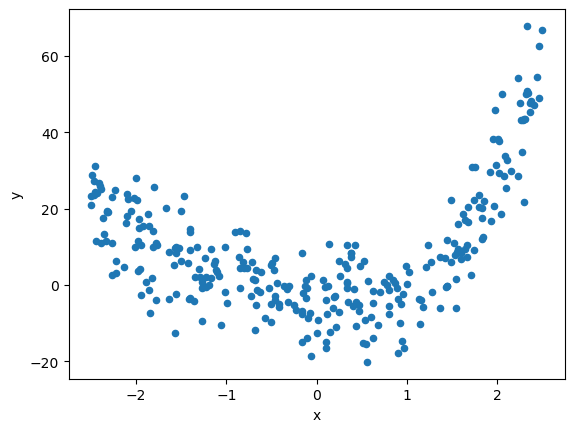

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

size = 300
X = np.random.rand(size) * 5 - 2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y=w4*(X**4)+w3*(X**3)+w2*(X**2)+w1*X+w0+np.random.randn(size)*8-4

df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Regresja liniowa

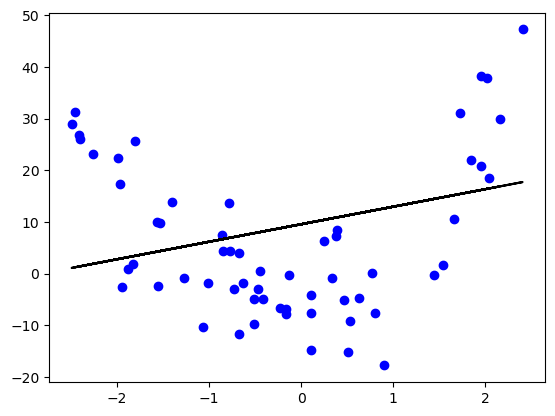

In [32]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

ylin_pred = lin_reg.predict(X_test)

plt.plot(X_test, ylin_pred, color="black")
plt.scatter(X_test, y_test, color="blue")

plt.show()

2. KNN

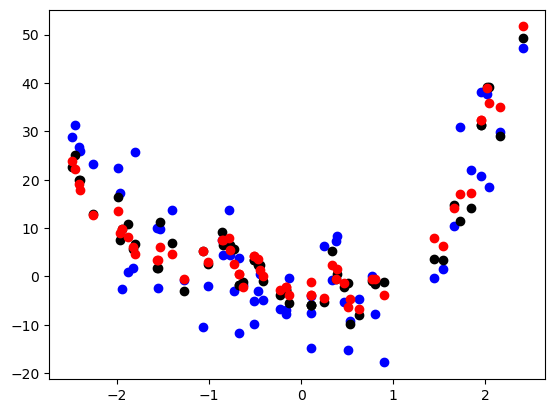

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn_3_reg = KNeighborsRegressor(n_neighbors=3)
knn_5_reg = KNeighborsRegressor(n_neighbors=5)

knn_3_reg.fit(X_train, y_train)
knn_5_reg.fit(X_train, y_train)

y3knn_pred = knn_3_reg.predict(X_test)
y5knn_pred = knn_5_reg.predict(X_test)

plt.scatter(X_test, y_test, color="blue")
plt.scatter(X_test, y3knn_pred, color="black")
plt.scatter(X_test, y5knn_pred, color="red")

3. Regresja wialomianowa

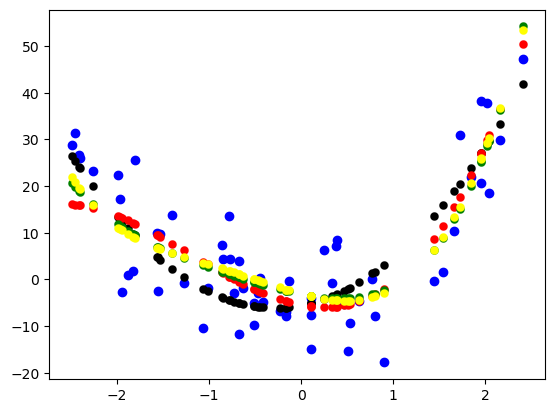

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly2_feat = PolynomialFeatures(degree=2)
poly3_feat = PolynomialFeatures(degree=3)
poly4_feat = PolynomialFeatures(degree=4)
poly5_feat = PolynomialFeatures(degree=5)

X_poly2 = poly2_feat.fit_transform(X_train)
X_poly3 = poly3_feat.fit_transform(X_train)
X_poly4 = poly4_feat.fit_transform(X_train)
X_poly5 = poly5_feat.fit_transform(X_train)


lin2 = LinearRegression()
lin2.fit(X_poly2, y_train)
y2poly_pred = lin2.predict(poly2_feat.fit_transform(X_test))

lin3 = LinearRegression()
lin3.fit(X_poly3, y_train)
y3poly_pred = lin3.predict(poly3_feat.fit_transform(X_test))

lin4 = LinearRegression()
lin4.fit(X_poly4, y_train)
y4poly_pred = lin4.predict(poly4_feat.fit_transform(X_test))

lin5 = LinearRegression()
lin5.fit(X_poly5, y_train)
y5poly_pred = lin5.predict(poly5_feat.fit_transform(X_test))

plt.scatter(X_test, y_test, color="blue")
plt.scatter(X_test, y2poly_pred, color="black", linewidths=0.1)
plt.scatter(X_test, y3poly_pred, color="red", linewidths=0.1)
plt.scatter(X_test, y4poly_pred, color="green", linewidths=0.1)
plt.scatter(X_test, y5poly_pred, color="yellow", linewidths=0.1)

4. Mean Squared Error

In [35]:
from sklearn.metrics import mean_squared_error

lin_MSE_train = mean_squared_error(y_train, lin_reg.predict(X_train))
lin_MSE_test = mean_squared_error(y_test, lin_reg.predict(X_test))

knn3_MSE_train = mean_squared_error(y_train, knn_3_reg.predict(X_train))
knn3_MSE_test = mean_squared_error(y_test, knn_3_reg.predict(X_test))
knn5_MSE_train = mean_squared_error(y_train, knn_5_reg.predict(X_train))
knn5_MSE_test = mean_squared_error(y_test, knn_5_reg.predict(X_test))

poly2_MSE_train = mean_squared_error(y_train, lin2.predict(poly2_feat.fit_transform(X_train)))
poly2_MSE_test = mean_squared_error(y_test, lin2.predict(poly2_feat.fit_transform(X_test)))
poly3_MSE_train = mean_squared_error(y_train, lin3.predict(poly3_feat.fit_transform(X_train)))
poly3_MSE_test = mean_squared_error(y_test, lin3.predict(poly3_feat.fit_transform(X_test)))
poly4_MSE_train = mean_squared_error(y_train, lin4.predict(poly4_feat.fit_transform(X_train)))
poly4_MSE_test = mean_squared_error(y_test, lin4.predict(poly4_feat.fit_transform(X_test)))
poly5_MSE_train = mean_squared_error(y_train, lin5.predict(poly5_feat.fit_transform(X_train)))
poly5_MSE_test = mean_squared_error(y_test, lin5.predict(poly5_feat.fit_transform(X_test)))

data = {
    "train_mse": [lin_MSE_train, knn3_MSE_train, knn5_MSE_train, poly2_MSE_train, poly3_MSE_train, poly4_MSE_train, poly5_MSE_train],
    "test_mse": [lin_MSE_test, knn3_MSE_test, knn5_MSE_test, poly2_MSE_test, poly3_MSE_test, poly4_MSE_test, poly5_MSE_test]
}

df = pd.DataFrame(data, index=["lin_reg", "knn_3_reg", "knn_5_reg", "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg"])

df.to_pickle("mse.pkl")

5. Lista obiektów

In [36]:
import pickle
obj_list = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (lin2,poly2_feat), (lin3, poly3_feat), (lin4, poly4_feat),(lin5, poly5_feat)]

with open("reg.pkl", "wb") as f:
    pickle.dump(obj_list, f)